In [ ]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:
def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])

    classes = np.array(test_dataset["list_classes"][:])
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

##Load dataset dari file h5

In [ ]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

##Menampilkan contoh gambar pada data train

class = [1] gambar cat


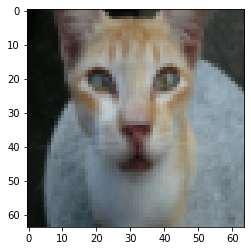

In [ ]:
index = 11
plt.imshow(train_set_x_orig[index])
print("class = " + str(train_set_y[:, index])+' gambar ' + classes[np.squeeze(train_set_y[:, index])].decode("utf-8"))

In [ ]:
m_train = len(train_set_x_orig)
m_test = len(test_set_x_orig)
num_px = train_set_x_orig.shape[1]

print ("Banyak data training = " + str(m_train))
print ("Banyak data testing = " + str(m_test))
print ("Dimensi: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("X_train shape: " + str(train_set_x_orig.shape))
print ("y_train shape: " + str(train_set_y.shape))
print ("X_test shape: " + str(test_set_x_orig.shape))
print ("y_test shape: " + str(test_set_y.shape))

Banyak data training = 209
Banyak data testing = 50
Dimensi: (64, 64, 3)
X_train shape: (209, 64, 64, 3)
y_train shape: (1, 209)
X_test shape: (50, 64, 64, 3)
y_test shape: (1, 50)


##Melakukan flatten gambar sehingga kini gambar 2D berbentuk vektor sehingga dapat dilakukan feed ke neural network

In [ ]:
train_set_x_orig.shape

(209, 64, 64, 3)

In [ ]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


##Normalisasi gambar

In [ ]:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

#Define Fungsi-Fungsi Pemodelan

##Gambaran Arsitektur



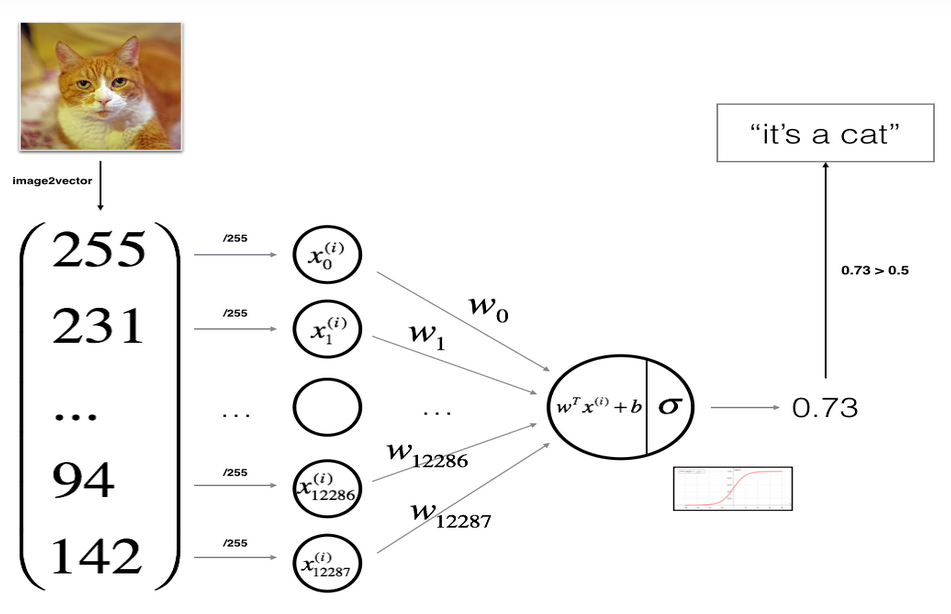

 prediksi = sigmoid(z)

 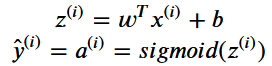


Loss function logistic regression
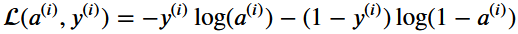

Cost (akumulasi loss) pada keseluruhan data training
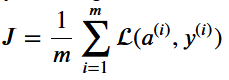

###Sigmoid function

Output sigmoid adalah nilai dari -1 hingga 1

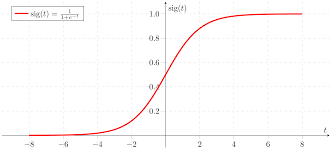

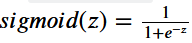

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

##Inisialisasi weight dan bias sama dengan nol

In [ ]:
def initWB(dim):
  w = np.zeros((dim, 1), dtype=float)
  b = 0.0
  return w, b

##Forward dan Backward

###Forward Prop
1. Hitung prediksi dengan weight dan bias awal
image.png


2. Hitung cost function yaitu akumulasi kesalahan (mean) terhadap loss function dari prediksi (a) dengan data asli (y)
image.png

### Backward Prop

Mengupdate weight dan bias berdasarkan cost function.

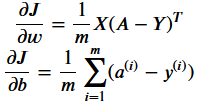


###Fungsi forward dan backward

In [ ]:
def propagate(w, b, X, Y):
  # FORWARD PROPAGATION
  m = X.shape[1] # banyak data
  A = sigmoid(np.dot(w.T, X) + b) # prediksi sigmoid(weight*X+bias)
  cost = -1/m * np.sum(Y*np.log(A) + (1-Y)*np.log(1-A)) # cost adalah mean dari loss logistic regression

  # BACKWARD PROPAGATION
  dw = 1/m * np.dot(X, (A-Y).T)
  db = 1/m * np.sum(A-Y)

  cost = np.squeeze(np.array(cost))
  grads = {"dw": dw, 
           "db": db}
  
  return grads, cost

##Optimizer

Update parameter (weight dan bias) dengan gradient descent
image.png

alfa adalah learning rate

In [ ]:
def optimize(w, b, X, Y, iterasi=100, learning_rate=0.009, print_cost=False):
  w = copy.deepcopy(w)
  b = copy.deepcopy(b)
  costs = []

  for i in range(iterasi):
    grads, cost = propagate(w, b, X, Y)
    dw = grads["dw"]
    db = grads["db"]

    # update weight dan bias
    w = w - (learning_rate*dw)
    b = b - (learning_rate*db)

    # rekam cost setiap 100 iterasi
    if i % 100 == 0:
      costs.append(cost)    
      if print_cost:
        print("Cost setelah iterasi %i: %f" % (i, cost))

  params = {"w": w, "b": b}
  grads = {"dw": dw, "db": db}
    
  return params, grads, costs

##Prediksi

Menghitung prediksi lalu memberikan pengkondisian jika output <= 0.5 maka termasuk kelas 1 (cat) jika tidak maka termasuk kelas 0 (bukan kucing)

In [ ]:
def predict(w, b, X):
  m = X.shape[1]
  Y_prediction = np.zeros((1, m)) # define array kategori output prediksi
  w = w.reshape(X.shape[0], 1)
  A = sigmoid(np.dot(w.T, X) + b) # output prediksi
  
  for i in range(A.shape[1]):
    if A[0, i] > 0.5 :
      Y_prediction[0,i] = 1
    else:
      Y_prediction[0,i] = 0

  return Y_prediction

#Pembuatan Model

In [ ]:
def model(X_train, Y_train, X_test, Y_test, iterasi=2000, learning_rate=0.5, print_cost=False):
  w, b = initWB(X_train.shape[0])
  params, grads, costs = optimize(w, b, X_train, Y_train, iterasi, learning_rate, print_cost)
  w = params["w"]
  b = params["b"]
  Y_prediction_test = predict(w, b, X_test)
  Y_prediction_train = predict(w, b, X_train)

  if print_cost:
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

  d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "iterasi": iterasi}
    
  return d  

In [ ]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, iterasi=4000, learning_rate=0.001, print_cost=True)

Cost setelah iterasi 0: 0.693147
Cost setelah iterasi 100: 0.591289
Cost setelah iterasi 200: 0.555796
Cost setelah iterasi 300: 0.528977
Cost setelah iterasi 400: 0.506881
Cost setelah iterasi 500: 0.487880
Cost setelah iterasi 600: 0.471108
Cost setelah iterasi 700: 0.456046
Cost setelah iterasi 800: 0.442350
Cost setelah iterasi 900: 0.429782
Cost setelah iterasi 1000: 0.418164
Cost setelah iterasi 1100: 0.407362
Cost setelah iterasi 1200: 0.397269
Cost setelah iterasi 1300: 0.387802
Cost setelah iterasi 1400: 0.378888
Cost setelah iterasi 1500: 0.370471
Cost setelah iterasi 1600: 0.362500
Cost setelah iterasi 1700: 0.354934
Cost setelah iterasi 1800: 0.347737
Cost setelah iterasi 1900: 0.340877
Cost setelah iterasi 2000: 0.334326
Cost setelah iterasi 2100: 0.328061
Cost setelah iterasi 2200: 0.322060
Cost setelah iterasi 2300: 0.316304
Cost setelah iterasi 2400: 0.310776
Cost setelah iterasi 2500: 0.305460
Cost setelah iterasi 2600: 0.300342
Cost setelah iterasi 2700: 0.295411
Cost

asli = 1, prediksi "cat"


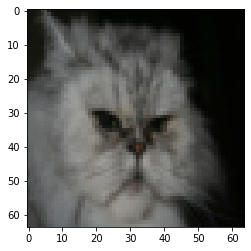

In [ ]:
index = 12
plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))
print ("asli = " + str(test_set_y[0,index]) + ", prediksi \"" + classes[int(logistic_regression_model['Y_prediction_test'][0,index])].decode("utf-8") +  "\"")